In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [12]:
# read data into program
id = "774725"

independent = pd.read_csv("data/Project1_PartA_Data/"+id+"_IV.csv")
dependent   = pd.read_csv("data/Project1_PartA_Data/"+id+"_DV.csv")

In [13]:
# sort and merge data
independent.sort_values("ID", inplace=True)
dependent.sort_values("ID", inplace=True)

rawdata = pd.DataFrame({"ID": np.arange(len(independent)),
                        "IV": independent["IV"],
                        "DV": dependent["DV"]})

In [14]:
# function to return fit results
def fit(data):
    # useful quantities
    xbar = data["IV"].mean()
    ybar = data["DV"].mean()
    Sxx = np.sum((data["IV"] - xbar)**2)
    Sxy = np.sum((data["IV"] - xbar) * (data["DV"] - ybar))
    Syy = np.sum((data["DV"] - ybar)**2)

    # estimate fit parameters
    B1 = Sxy / Sxx
    B0 = ybar - B1*xbar
    SSres = np.sum((data["DV"] - np.polyval([B1, B0], data["IV"]))**2)

    # compute rsq
    rsq = (Syy - SSres) / Syy

    return B1, B0, rsq

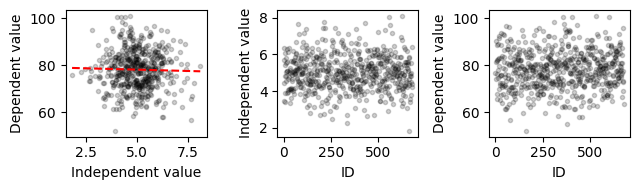

In [15]:
# initial visualizations
# left:   scatterplot of independent vs dependent
# center: scatterplot of ID vs independent
# right:  scatterplot of IS vs dependent
# NaNs are omitted from these visualizations

b4_imp = fit(rawdata)

fig, (lax, cax, rax) = plt.subplots(nrows=1, ncols=3, figsize=(6.5, 2),
                                    layout="tight")

lax.set_xlabel("Independent value")
lax.set_ylabel("Dependent value")
lax.scatter(rawdata["IV"], rawdata["DV"],
            marker=".", alpha=0.1875, color="black")

lax.plot(rawdata.sort_values("IV")["IV"], np.polyval(b4_imp[:2], rawdata.sort_values("IV")["IV"]),
         color="red", linestyle="dashed")

cax.set_xlabel("ID")
cax.set_ylabel("Independent value")
cax.scatter(rawdata["ID"], rawdata["IV"],
            marker=".", alpha=0.1875, color="black")

rax.set_xlabel("ID")
rax.set_ylabel("Dependent value")
rax.scatter(rawdata["ID"], rawdata["DV"],
            marker=".", alpha=0.1875, color="black")

fig.savefig("figures/part_a_no_nans.png")

In [16]:
# find where data is missing
num_vals = len(rawdata)

IV_nan = rawdata["IV"].isna().sum()
DV_nan = rawdata["DV"].isna().sum()
data_nan = np.logical_and(rawdata["IV"].isna(), rawdata["DV"].isna()).sum()


print("There are " + str(num_vals) + " total observations")
print("The independent values contain " + str(IV_nan) + " NaNs; " + str(100*IV_nan/num_vals) + " percent")
print("The dependent values contain " + str(DV_nan) + " NaNs; " + str(100*DV_nan/num_vals) + " percent")
print("There are " + str(data_nan) + " pairs of NaNs in the data; " + str(100*data_nan/num_vals) + " percent")
print("There are " + str(IV_nan+DV_nan-data_nan) + " points with a single NaN; " +
      str(100*(IV_nan+DV_nan-data_nan)/num_vals) + " percent")
print("There are " + str(IV_nan+DV_nan+data_nan) + " points with at least one NaN; " +
      str(100*(IV_nan+DV_nan+data_nan)/num_vals) + " percent")

There are 678 total observations
The independent values contain 93 NaNs; 13.716814159292035 percent
The dependent values contain 66 NaNs; 9.734513274336283 percent
There are 8 pairs of NaNs in the data; 1.1799410029498525 percent
There are 151 points with a single NaN; 22.271386430678465 percent
There are 167 points with at least one NaN; 24.63126843657817 percent


In [17]:
# imputation
# using k nearest neighbors from sklearn
# original was going to use quadratic interpolation, but the leading NaN is a problem

imputer = KNNImputer() # default k = 5
imputed = imputer.fit_transform(rawdata[["IV", "DV"]])

data = pd.DataFrame({"ID": np.arange(len(independent)),
                     "IV": imputed[:,0],
                     "DV": imputed[:,1]})

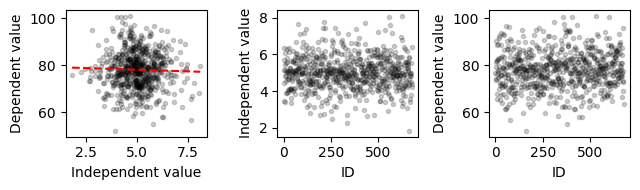

In [18]:
# re-visualize
# left:   scatterplot of independent vs dependent
# center: scatterplot of ID vs independent
# right:  scatterplot of IS vs dependent
# NaNs have been imputed KNN, k=5

aft_imp = fit(data)

fig, (lax, cax, rax) = plt.subplots(nrows=1, ncols=3, figsize=(6.5, 2),
                                    layout="tight")

lax.set_xlabel("Independent value")
lax.set_ylabel("Dependent value")
lax.scatter(data["IV"], data["DV"],
            marker=".", alpha=0.1875, color="black")

lax.plot(data.sort_values("IV")["IV"], np.polyval(aft_imp[:2], data.sort_values("IV")["IV"]),
         color="red", linestyle="dashed")

cax.set_xlabel("ID")
cax.set_ylabel("Independent value")
cax.scatter(data["ID"], data["IV"],
            marker=".", alpha=0.1875, color="black")

rax.set_xlabel("ID")
rax.set_ylabel("Dependent value")
rax.scatter(data["ID"], data["DV"],
            marker=".", alpha=0.1875, color="black")

fig.savefig("figures/part_a_imputed.png")

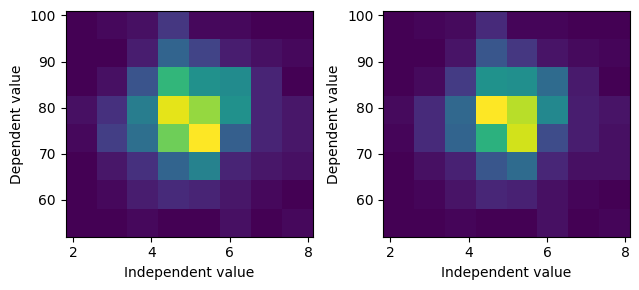

In [19]:
# for fun, heatmap the IV DV plots
# left: raw data sans NaN
# right: imputed data
fig, (rax, iax) = plt.subplots(nrows=1, ncols=2, layout="tight", figsize=(6.5, 3))

rax.set_xlabel("Independent value")
rax.set_ylabel("Dependent value")
rax.hist2d(rawdata.dropna()["IV"], rawdata.dropna()["DV"], bins=8)

iax.set_xlabel("Independent value")
iax.set_ylabel("Dependent value")
iax.hist2d(data["IV"], data["DV"], bins=8)

fig.savefig("figures/part_a_2dhist.png")

In [20]:
print("Before imputation")
print("IV mean: " + str(rawdata["IV"].mean()))
print("IV median: " + str(rawdata["IV"].median()))
print("IV std. deviation: " + str(np.std(rawdata["IV"])))
print("DV mean: " + str(rawdata["DV"].mean()))
print("DV median: " + str(rawdata["DV"].median()))
print("DV std. deviation: " + str(np.std(rawdata["DV"])))
print("B1: " + str(b4_imp[0]))
print("B0: " + str(b4_imp[1]))
print("r^2: " + str(b4_imp[2]))

print()

print("After imputation")
print("IV mean: " + str(data["IV"].mean()))
print("IV median: " + str(data["IV"].median()))
print("IV std. deviation: " + str(np.std(data["IV"])))
print("DV mean: " + str(data["DV"].mean()))
print("DV median: " + str(data["DV"].median()))
print("DV std. deviation: " + str(np.std(data["DV"])))
print("B1: " + str(aft_imp[0]))
print("B0: " + str(aft_imp[1]))
print("r^2: " + str(aft_imp[2]))

print()

print("Difference")
print("IV mean: " + str(rawdata["IV"].mean() - data["IV"].mean()))
print("IV median: " + str(rawdata["IV"].median() - data["IV"].median()))
print("IV std. deviation: " + str(np.std(rawdata["IV"]) - np.std(data["IV"])))
print("DV mean: " + str(rawdata["DV"].mean() - data["DV"].mean()))
print("DV median: " + str(rawdata["DV"].median() - data["DV"].median()))
print("DV std. deviation: " + str(np.std(rawdata["DV"]) - np.std(data["DV"])))
print("B1: " + str(b4_imp[0] - aft_imp[0]))
print("B0: " + str(b4_imp[1] - aft_imp[1]))
print("r^2: " + str(b4_imp[2] - aft_imp[2]))

Before imputation
IV mean: 5.0113919062941354
IV median: 4.97550306413202
IV std. deviation: 0.9789526998972242
DV mean: 78.0667133290784
DV median: 78.07662435131336
DV std. deviation: 8.241602168867011
B1: -0.2264404763635538
B0: 79.2014952995841
r^2: 0.12948546271773775

After imputation
IV mean: 5.012669916453292
IV median: 4.988251144342243
IV std. deviation: 0.9200347737818115
DV mean: 78.03045871647271
DV median: 78.0667133290784
DV std. deviation: 7.9216032999732215
B1: -0.2798705913177185
B0: 79.43335761007103
r^2: 0.0010565664975097843

Difference
IV mean: -0.0012780101591562953
IV median: -0.012748080210222668
IV std. deviation: 0.05891792611541269
DV mean: 0.03625461260568841
DV median: 0.009911022234959432
DV std. deviation: 0.3199988688937898
B1: 0.05343011495416472
B0: -0.23186231048693173
r^2: 0.12842889622022796
